# Series와 DataFrame 구조이해와 생성하기
## Pandas 라이브러리
* 데이터 분석과 처리를 쉽게 할 수 있게 도와주는 라이브러리 (+시각화 기능)

## 데이터의 구성
* **변수**와 **관측치**
    * 열에 해당하는 부분 : 변수
    * 행에 해당하는 부분 : 관측치 (행 단위로 관측치 쌓임)
    
## Pandas 자료구조
* **Series** : 인덱싱 기능을 추가한 **1차원 배열** (by. ndarray, list, tuple, dict...)
* **DataFrame** : 인덱스와 컬럼으로 구성된 **2차원 데이터 구조**

## Series 데이터 생성하기
#### pandas와 numpy 임포트

In [1]:
import pandas as pd
import numpy as np

#### 배열(ndarray)로 Series 데이터 생성하기

In [2]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [3]:
a1 = range(5)
a2 = range(1, 6)
print(a1, a2)
print(type(a))

range(0, 5) range(1, 6)
<class 'numpy.ndarray'>


In [4]:
s1 = pd.Series(a)
s1 # 숨어있던 인덱스까지 보여줌 (But, 1차원 배열!)

0    0
1    1
2    2
3    3
4    4
dtype: int32

#### 리스트로 Series 데이터 생성

In [5]:
b = ['a','b','c','d','e']
s2 = pd.Series(b)
s2

0    a
1    b
2    c
3    d
4    e
dtype: object

In [6]:
s2 = pd.Series(a,b)   #인덱스를 명시하기 (a로 series를 만들되, b를 인덱스로 지정)
s2

a    0
b    1
c    2
d    3
e    4
dtype: int32

In [7]:
c = [['a','b','c'],['d','e','f']]
s3 = pd.Series(c)
s3

0    [a, b, c]
1    [d, e, f]
dtype: object

#### 튜플로 Series 데이터 생성

In [8]:
tp1 = ('a','b','c','d','e')
s4 = pd.Series(tp1)
s4

0    a
1    b
2    c
3    d
4    e
dtype: object

In [9]:
tp2 = ('a','b','c','d','e')
s4 = pd.Series(tp2, b)
s4

a    a
b    b
c    c
d    d
e    e
dtype: object

#### 딕셔너리로 Series 데이터 생성

In [10]:
d1 = {'국어':100, '영어':95, '수학':90} # 딕셔너리는 자동으로 key가 index로 감!
s5 = pd.Series(d1)
s5

국어    100
영어     95
수학     90
dtype: int64

In [11]:
d2 = {'국어':[100,90,95], '영어':[95,30,60], '수학':[50,60,90]}
s6 = pd.Series(d2)
s6

국어    [100, 90, 95]
영어     [95, 30, 60]
수학     [50, 60, 90]
dtype: object

## Series 데이터 속성 과 인덱스활용

In [12]:
s5.index

Index(['국어', '영어', '수학'], dtype='object')

In [13]:
s5.values

array([100,  95,  90], dtype=int64)

In [14]:
s5['국어']

100

In [15]:
s4[0] # tp1 = ('a','b','c','d','e'), s4 = pd.Series(tp1)

'a'

In [16]:
s5['국어']=90 # 인덱스를 통해 값 변경 가능!

In [17]:
s5 # 100 -> 90

국어    90
영어    95
수학    90
dtype: int64

## DataFrame 생성하기
* Series(1차원) -> **Datframe(2차원)**
* 따라서, **인덱스 : row, col**으로 구성
* 표 형식의 데이터 (.csv) ==> 엑셀 형식일뿐, 엑셀 파일은 아님!

#### 데이터 파일로 DataFrame 생성하기
- NBA 농구선수들의 게임 기록 데이터 200개 항목 (변수 8개, 관측치 200개)
 - Player : 선수이름
 - Pos : 포지션
 - 3P : 한 경기 평균 3점 슛 성공 횟수
 - 2P : 한 경기 평균 2점 슛 성공 횟수
 - TRB : 한 경기 리바운드 성공 횟수
 - AST : 한 경기 어시스트 성공 횟수
 - STL : 한 경기 스틸 성공 횟수
 - BLK : 한 경기 블로킹 성공 횟수

In [18]:
# 파일 (.csv) 불러오기 (파일을 불러와서 dataframe 형식으로 만들기)
basket_ball= pd.read_csv('./basketball_stat.csv')
basket_ball # DataFrame 형식의 데이터

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2
1,Steven Adams,C,0.0,6.0,9.5,1.6,1.5,1.0
2,Bam Adebayo,C,0.0,3.4,7.3,2.2,0.9,0.8
3,DeVaughn Akoon-Purcell,SG,0.0,0.4,0.6,0.9,0.3,0.0
4,LaMarcus Aldridge,C,0.1,8.3,9.2,2.4,0.5,1.3
5,Rawle Alkins,SG,0.3,1.0,2.6,1.3,0.1,0.0
6,Grayson Allen,SG,0.8,0.9,0.6,0.7,0.2,0.2
7,Jarrett Allen,C,0.1,4.1,8.4,1.4,0.5,1.5
8,Kadeem Allen,SG,0.9,2.5,2.7,4.0,0.8,0.2
9,Ike Anigbogu,C,0.0,0.0,1.0,0.3,0.0,0.3


In [19]:
# 파일 (.xlsx) 불러오기
basket_ball= pd.read_excel('./basketball_stat.xlsx')
basket_ball

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2
1,Steven Adams,C,0.0,6.0,9.5,1.6,1.5,1.0
2,Bam Adebayo,C,0.0,3.4,7.3,2.2,0.9,0.8
3,DeVaughn Akoon-Purcell,SG,0.0,0.4,0.6,0.9,0.3,0.0
4,LaMarcus Aldridge,C,0.1,8.3,9.2,2.4,0.5,1.3
5,Rawle Alkins,SG,0.3,1.0,2.6,1.3,0.1,0.0
6,Grayson Allen,SG,0.8,0.9,0.6,0.7,0.2,0.2
7,Jarrett Allen,C,0.1,4.1,8.4,1.4,0.5,1.5
8,Kadeem Allen,SG,0.9,2.5,2.7,4.0,0.8,0.2
9,Ike Anigbogu,C,0.0,0.0,1.0,0.3,0.0,0.3


# DataFrame 데이터 살펴보기
- **head 함수, tail 함수** : 앞 또는 뒤에서 **일부분** 데이터 보기 (간단히 확인)

In [20]:
basket_ball.head(3) # 위에서 3줄만 보기

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2
1,Steven Adams,C,0.0,6.0,9.5,1.6,1.5,1.0
2,Bam Adebayo,C,0.0,3.4,7.3,2.2,0.9,0.8


In [21]:
basket_ball.tail(3) # 밑에서 3줄만 보기

,Player,Pos,3P,2P,TRB,AST,STL,BLK
197,Lance Stephenson,SG,1.1,1.6,3.2,2.1,0.6,0.1
198,Garrett Temple,SG,1.2,1.6,2.9,1.4,1.0,0.4
199,Jared Terrell,SG,0.3,0.6,0.4,0.9,0.2,0.1


#### DataFrame 데이터 파악하기
- shape 속성 (row, column)
- index 속성 : 각 아이템의 식별값
- columns 속성 : 각각 데이터의 특성
- describe 함수 : 숫자형 데이터의 **통계치 계산** (각 변수의 총 개수, 평균값 등)
- info 함수 : 데이터 타입, 각 아이템의 개수 등을 출력 (각 변수의 구체적인 정보)

In [22]:
basket_ball.shape

(200, 8)

In [23]:
basket_ball.index

RangeIndex(start=0, stop=200, step=1)

In [24]:
basket_ball.columns

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')

In [25]:
basket_ball.describe() 

,3P,2P,TRB,AST,STL,BLK
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.82650,2.445000,3.866500,1.649500,0.592000,0.454000
std,0.84321,1.885591,2.853901,1.342988,0.383892,0.491316
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,1.100000,1.900000,0.875000,0.300000,0.100000
50%,0.65000,1.900000,3.200000,1.200000,0.500000,0.300000
75%,1.32500,3.225000,5.000000,2.100000,0.800000,0.600000
max,4.00000,8.600000,15.600000,7.700000,1.800000,2.400000


In [26]:
basket_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
Player    200 non-null object
Pos       200 non-null object
3P        200 non-null float64
2P        200 non-null float64
TRB       200 non-null float64
AST       200 non-null float64
STL       200 non-null float64
BLK       200 non-null float64
dtypes: float64(6), object(2)
memory usage: 12.6+ KB


### 원하는 '컬럼(열)' 선택하기

In [27]:
basket_ball.head() # 디폴트 : 위에서부터 5개만

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2
1,Steven Adams,C,0.0,6.0,9.5,1.6,1.5,1.0
2,Bam Adebayo,C,0.0,3.4,7.3,2.2,0.9,0.8
3,DeVaughn Akoon-Purcell,SG,0.0,0.4,0.6,0.9,0.3,0.0
4,LaMarcus Aldridge,C,0.1,8.3,9.2,2.4,0.5,1.3


In [28]:
basket_ball['3P'] # 원하는 열 가져오기(그냥 인덱스처럼 쓰기, 시리즈 형식으로 출력)

0      1.3
1      0.0
2      0.0
3      0.0
4      0.1
5      0.3
6      0.8
7      0.1
8      0.9
9      0.0
10     0.0
11     0.9
12     0.1
13     0.4
14     1.6
15     0.4
16     1.4
17     2.5
18     2.0
19     1.9
20     0.0
21     0.6
22     0.8
23     0.0
24     0.0
25     0.6
26     1.9
27     0.0
28     2.1
29     1.4
      ... 
170    0.7
171    0.0
172    0.0
173    0.0
174    0.5
175    1.1
176    3.2
177    0.2
178    1.1
179    2.2
180    0.4
181    1.4
182    0.5
183    0.0
184    2.7
185    0.1
186    0.8
187    0.7
188    2.1
189    1.5
190    1.0
191    0.5
192    1.6
193    1.1
194    1.0
195    1.0
196    0.0
197    1.1
198    1.2
199    0.3
Name: 3P, Length: 200, dtype: float64

In [29]:
# 위에처럼 1차원 배열 series 형식이 아니라, 2차원 배열 dataframe 형식으로 보려면?
basket_ball[['3P']]     #[]안에 컬럼이름을 리스트 형식으로 써줌 (**대괄호 하나 더!**)

,3P
0,1.3
1,0.0
2,0.0
3,0.0
4,0.1
5,0.3
6,0.8
7,0.1
8,0.9
9,0.0


In [30]:
basket_ball[['Player','AST','BLK']] # 대괄호 하나 더 붙이기 (2차원 형식으로 넣기)

,Player,AST,BLK
0,Alex Abrines,0.6,0.2
1,Steven Adams,1.6,1.0
2,Bam Adebayo,2.2,0.8
3,DeVaughn Akoon-Purcell,0.9,0.0
4,LaMarcus Aldridge,2.4,1.3
5,Rawle Alkins,1.3,0.0
6,Grayson Allen,0.7,0.2
7,Jarrett Allen,1.4,1.5
8,Kadeem Allen,4.0,0.2
9,Ike Anigbogu,0.3,0.3


#### 조건을 주어 원하는 컬럼 선택하기
- & : and 둘 다 만족
- | : or 둘 중 하나만 만족해도 됨

In [31]:
basket_ball[basket_ball['3P'] > 0.5] # basket_ball['3P'] > 0.5 가 이미 1차원 배열!

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2
6,Grayson Allen,SG,0.8,0.9,0.6,0.7,0.2,0.2
8,Kadeem Allen,SG,0.9,2.5,2.7,4.0,0.8,0.2
11,Dwayne Bacon,SG,0.9,2.0,2.1,1.1,0.3,0.1
14,Will Barton,SG,1.6,2.7,4.6,2.9,0.4,0.5
16,Kent Bazemore,SG,1.4,2.7,3.9,2.3,1.3,0.6
17,Bradley Beal,SG,2.5,6.8,5.0,5.5,1.5,0.7
18,Malik Beasley,SG,2.0,2.3,2.5,1.2,0.7,0.1
19,Marco Belinelli,SG,1.9,1.7,2.5,1.7,0.4,0.1
21,DeAndre' Bembry,SG,0.6,2.7,4.4,2.5,1.3,0.5


In [32]:
# 여러 조건 섞어서 가져오기
basket_ball[(basket_ball['3P'] > 0.5) & (basket_ball['2P'] > 2.0)]

,Player,Pos,3P,2P,TRB,AST,STL,BLK
8,Kadeem Allen,SG,0.9,2.5,2.7,4.0,0.8,0.2
14,Will Barton,SG,1.6,2.7,4.6,2.9,0.4,0.5
16,Kent Bazemore,SG,1.4,2.7,3.9,2.3,1.3,0.6
17,Bradley Beal,SG,2.5,6.8,5.0,5.5,1.5,0.7
18,Malik Beasley,SG,2.0,2.3,2.5,1.2,0.7,0.1
21,DeAndre' Bembry,SG,0.6,2.7,4.4,2.5,1.3,0.5
25,Antonio Blakeney,SG,0.6,2.3,1.9,0.7,0.2,0.2
26,Bogdan Bogdanovi?,SG,1.9,3.2,3.5,3.8,1.0,0.2
28,Devin Booker,SG,2.1,7.0,4.1,6.8,0.9,0.2
29,Avery Bradley,SG,1.4,2.6,2.8,2.4,0.7,0.3


### 원하는 '행' 선택하기

**[.loc, .iloc]**로 **행** 선택 가능   
> 그냥 [0]처럼 인덱스에 넣게 되면, **'행'** 이 아니라 **'열'** 로 인식해서 가져옴!  
  
- **loc** : **인덱스 자체**를 사용 (*ex. 'a', 'b', 'c'... 이런 인덱스 그대로*)
> loc의 경우에는, **basket_ball.loc['a']** 이런식으로 써주어야 함!
- **iloc** : **0 based index**로 사용 (*ex. 무시하고 0, 1, 2... 순서대로*)
> iloc의 경우에는, **basket_ball.loc[0]** 이런식으로 써줘도 됨!

In [33]:
basket_ball.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2
1,Steven Adams,C,0.0,6.0,9.5,1.6,1.5,1.0
2,Bam Adebayo,C,0.0,3.4,7.3,2.2,0.9,0.8
3,DeVaughn Akoon-Purcell,SG,0.0,0.4,0.6,0.9,0.3,0.0
4,LaMarcus Aldridge,C,0.1,8.3,9.2,2.4,0.5,1.3


In [34]:
basket_ball.loc[0] # 0행 데이터 가져오기 (series, 1차원 배열로)

Player    Alex Abrines
Pos                 SG
3P                 1.3
2P                 0.5
TRB                1.5
AST                0.6
STL                0.5
BLK                0.2
Name: 0, dtype: object

In [35]:
basket_ball.loc[[0]] # 0행 데이터 가져오기 (dataframe, 2차원 배열로)

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2


In [36]:
basket_ball.iloc[0] # iloc : index loc. 즉, 인덱스가 'a','b'.. 여도 순서대로 접근!

Player    Alex Abrines
Pos                 SG
3P                 1.3
2P                 0.5
TRB                1.5
AST                0.6
STL                0.5
BLK                0.2
Name: 0, dtype: object

In [37]:
basket_ball.iloc[[0]]

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2


In [38]:
basket_ball.iloc[[0, 3, 6]] # 여러 행 가져오기

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2
3,DeVaughn Akoon-Purcell,SG,0.0,0.4,0.6,0.9,0.3,0.0
6,Grayson Allen,SG,0.8,0.9,0.6,0.7,0.2,0.2


In [39]:
basket_ball.loc[[0, 3, 6]]

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2
3,DeVaughn Akoon-Purcell,SG,0.0,0.4,0.6,0.9,0.3,0.0
6,Grayson Allen,SG,0.8,0.9,0.6,0.7,0.2,0.2


### 행과 열 동시 선택하기
* df**.loc[[row], [col]]**

In [40]:
basket_ball.loc[[0,3,6],['Player', 'TRB', 'BLK']] # loc.[[행, 열]]

,Player,TRB,BLK
0,Alex Abrines,1.5,0.2
3,DeVaughn Akoon-Purcell,0.6,0.0
6,Grayson Allen,0.6,0.2


In [41]:
basket_ball.iloc[[0,3,6],[0,4,7]] # iloc로 쓰면, 문자 대신 숫자 인덱스로 쓸 수 있음..

,Player,TRB,BLK
0,Alex Abrines,1.5,0.2
3,DeVaughn Akoon-Purcell,0.6,0.0
6,Grayson Allen,0.6,0.2


<hr>

# DataFrame 열과 행 추가, 삭제하기
* cf. 삭제는 열과 행 둘 다 df.drop([ ], axis = 0(1))

In [42]:
import matplotlib.pyplot as plt

basket_ball.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2
1,Steven Adams,C,0.0,6.0,9.5,1.6,1.5,1.0
2,Bam Adebayo,C,0.0,3.4,7.3,2.2,0.9,0.8
3,DeVaughn Akoon-Purcell,SG,0.0,0.4,0.6,0.9,0.3,0.0
4,LaMarcus Aldridge,C,0.1,8.3,9.2,2.4,0.5,1.3


In [43]:
basket_ball.shape

(200, 8)

### 새 column 추가하기
- **[ ]** 사용하여 추가하기 (**해당 인덱스가 없으면, 추가하는 것!**)
- **insert()** 함수 사용하여 원하는 위치에 추가하기

In [44]:
#리스트에서 새로운 데이터 추가히기
list = [0,1,2,3,4,5]
list[0] = 'a'
list

['a', 1, 2, 3, 4, 5]

In [45]:
list.insert(2, 11) # 인덱스 2번 위치에 11을 넣어라
list

['a', 1, 11, 2, 3, 4, 5]

In [46]:
basket_ball.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2
1,Steven Adams,C,0.0,6.0,9.5,1.6,1.5,1.0
2,Bam Adebayo,C,0.0,3.4,7.3,2.2,0.9,0.8
3,DeVaughn Akoon-Purcell,SG,0.0,0.4,0.6,0.9,0.3,0.0
4,LaMarcus Aldridge,C,0.1,8.3,9.2,2.4,0.5,1.3


In [47]:
basket_ball['3P_double'] = 0 # 3P_double 라는 인덱스 없으므로 새로운 열로 추가
basket_ball.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK,3P_double
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2,0
1,Steven Adams,C,0.0,6.0,9.5,1.6,1.5,1.0,0
2,Bam Adebayo,C,0.0,3.4,7.3,2.2,0.9,0.8,0
3,DeVaughn Akoon-Purcell,SG,0.0,0.4,0.6,0.9,0.3,0.0,0
4,LaMarcus Aldridge,C,0.1,8.3,9.2,2.4,0.5,1.3,0


In [48]:
basket_ball['3P_double'] = basket_ball['3P'] * 2 # 각각 2배씩해서 넣어주기
basket_ball

,Player,Pos,3P,2P,TRB,AST,STL,BLK,3P_double
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2,2.6
1,Steven Adams,C,0.0,6.0,9.5,1.6,1.5,1.0,0.0
2,Bam Adebayo,C,0.0,3.4,7.3,2.2,0.9,0.8,0.0
3,DeVaughn Akoon-Purcell,SG,0.0,0.4,0.6,0.9,0.3,0.0,0.0
4,LaMarcus Aldridge,C,0.1,8.3,9.2,2.4,0.5,1.3,0.2
5,Rawle Alkins,SG,0.3,1.0,2.6,1.3,0.1,0.0,0.6
6,Grayson Allen,SG,0.8,0.9,0.6,0.7,0.2,0.2,1.6
7,Jarrett Allen,C,0.1,4.1,8.4,1.4,0.5,1.5,0.2
8,Kadeem Allen,SG,0.9,2.5,2.7,4.0,0.8,0.2,1.8
9,Ike Anigbogu,C,0.0,0.0,1.0,0.3,0.0,0.3,0.0


In [49]:
basket_ball['3P_tripple'] = basket_ball['3P_double'] + basket_ball['3P']
basket_ball

,Player,Pos,3P,2P,TRB,AST,STL,BLK,3P_double,3P_tripple
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2,2.6,3.9
1,Steven Adams,C,0.0,6.0,9.5,1.6,1.5,1.0,0.0,0.0
2,Bam Adebayo,C,0.0,3.4,7.3,2.2,0.9,0.8,0.0,0.0
3,DeVaughn Akoon-Purcell,SG,0.0,0.4,0.6,0.9,0.3,0.0,0.0,0.0
4,LaMarcus Aldridge,C,0.1,8.3,9.2,2.4,0.5,1.3,0.2,0.3
5,Rawle Alkins,SG,0.3,1.0,2.6,1.3,0.1,0.0,0.6,0.9
6,Grayson Allen,SG,0.8,0.9,0.6,0.7,0.2,0.2,1.6,2.4
7,Jarrett Allen,C,0.1,4.1,8.4,1.4,0.5,1.5,0.2,0.3
8,Kadeem Allen,SG,0.9,2.5,2.7,4.0,0.8,0.2,1.8,2.7
9,Ike Anigbogu,C,0.0,0.0,1.0,0.3,0.0,0.3,0.0,0.0


In [50]:
# insert()로 열 추가
basket_ball.insert(3, '3P10', basket_ball['3P']*10) # 3열 위치에 '3P10'이름의 열 추가
basket_ball.head()

,Player,Pos,3P,3P10,2P,TRB,AST,STL,BLK,3P_double,3P_tripple
0,Alex Abrines,SG,1.3,13.0,0.5,1.5,0.6,0.5,0.2,2.6,3.9
1,Steven Adams,C,0.0,0.0,6.0,9.5,1.6,1.5,1.0,0.0,0.0
2,Bam Adebayo,C,0.0,0.0,3.4,7.3,2.2,0.9,0.8,0.0,0.0
3,DeVaughn Akoon-Purcell,SG,0.0,0.0,0.4,0.6,0.9,0.3,0.0,0.0,0.0
4,LaMarcus Aldridge,C,0.1,1.0,8.3,9.2,2.4,0.5,1.3,0.2,0.3


### 새 row 추가하기
* **.loc[ ]** 사용하여 추가하기

In [51]:
basket_ball.loc['new_row'] = 0 # 없으면 맨 아래에 행 추가
basket_ball.tail() # 아래에서 5개 출력

,Player,Pos,3P,3P10,2P,TRB,AST,STL,BLK,3P_double,3P_tripple
196,D.J. Stephens,SG,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
197,Lance Stephenson,SG,1.1,11.0,1.6,3.2,2.1,0.6,0.1,2.2,3.3
198,Garrett Temple,SG,1.2,12.0,1.6,2.9,1.4,1.0,0.4,2.4,3.6
199,Jared Terrell,SG,0.3,3.0,0.6,0.4,0.9,0.2,0.1,0.6,0.9
new_row,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
basket_ball.loc['new_row'] = basket_ball.loc[199] * 2 # 문자열 * 2 = 이어붙이기
basket_ball.tail()

,Player,Pos,3P,3P10,2P,TRB,AST,STL,BLK,3P_double,3P_tripple
196,D.J. Stephens,SG,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
197,Lance Stephenson,SG,1.1,11.0,1.6,3.2,2.1,0.6,0.1,2.2,3.3
198,Garrett Temple,SG,1.2,12.0,1.6,2.9,1.4,1.0,0.4,2.4,3.6
199,Jared Terrell,SG,0.3,3.0,0.6,0.4,0.9,0.2,0.1,0.6,0.9
new_row,Jared TerrellJared Terrell,SGSG,0.6,6.0,1.2,0.8,1.8,0.4,0.2,1.2,1.8


In [53]:
basket_ball.loc['new_row'] = basket_ball.loc['new_row'] + basket_ball.loc[199]
basket_ball.tail()

,Player,Pos,3P,3P10,2P,TRB,AST,STL,BLK,3P_double,3P_tripple
196,D.J. Stephens,SG,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
197,Lance Stephenson,SG,1.1,11.0,1.6,3.2,2.1,0.6,0.1,2.2,3.3
198,Garrett Temple,SG,1.2,12.0,1.6,2.9,1.4,1.0,0.4,2.4,3.6
199,Jared Terrell,SG,0.3,3.0,0.6,0.4,0.9,0.2,0.1,0.6,0.9
new_row,Jared TerrellJared TerrellJared Terrell,SGSGSG,0.9,9.0,1.8,1.2,2.7,0.6,0.3,1.8,2.7


### column(열) 삭제하기
- **drop()** 함수 사용하여 삭제, **axis = 1 : 열 삭제!** 
> drop()만 하면 원본을 삭제하는 것이 아니라, 출력만 삭제되는 것!
- **원본을 삭제**하기 위해서는 **inplace = True** 매개변수를 주어야 함
- **리스트**를 사용하여 여러개 한번에 삭제 가능

In [54]:
basket_ball.drop('3P_tripple', axis=1) # axis=1 : 열 삭제 (0 : 행)
# drop()함수 실행하면 출력할때만 삭제된 것처럼 출력됨 (원본은 삭제 x)

,Player,Pos,3P,3P10,2P,TRB,AST,STL,BLK,3P_double
0,Alex Abrines,SG,1.3,13.0,0.5,1.5,0.6,0.5,0.2,2.6
1,Steven Adams,C,0.0,0.0,6.0,9.5,1.6,1.5,1.0,0.0
2,Bam Adebayo,C,0.0,0.0,3.4,7.3,2.2,0.9,0.8,0.0
3,DeVaughn Akoon-Purcell,SG,0.0,0.0,0.4,0.6,0.9,0.3,0.0,0.0
4,LaMarcus Aldridge,C,0.1,1.0,8.3,9.2,2.4,0.5,1.3,0.2
5,Rawle Alkins,SG,0.3,3.0,1.0,2.6,1.3,0.1,0.0,0.6
6,Grayson Allen,SG,0.8,8.0,0.9,0.6,0.7,0.2,0.2,1.6
7,Jarrett Allen,C,0.1,1.0,4.1,8.4,1.4,0.5,1.5,0.2
8,Kadeem Allen,SG,0.9,9.0,2.5,2.7,4.0,0.8,0.2,1.8
9,Ike Anigbogu,C,0.0,0.0,0.0,1.0,0.3,0.0,0.3,0.0


In [55]:
basket_ball.head() # 원본은 삭제 안되어 있음!! 

,Player,Pos,3P,3P10,2P,TRB,AST,STL,BLK,3P_double,3P_tripple
0,Alex Abrines,SG,1.3,13.0,0.5,1.5,0.6,0.5,0.2,2.6,3.9
1,Steven Adams,C,0.0,0.0,6.0,9.5,1.6,1.5,1.0,0.0,0.0
2,Bam Adebayo,C,0.0,0.0,3.4,7.3,2.2,0.9,0.8,0.0,0.0
3,DeVaughn Akoon-Purcell,SG,0.0,0.0,0.4,0.6,0.9,0.3,0.0,0.0,0.0
4,LaMarcus Aldridge,C,0.1,1.0,8.3,9.2,2.4,0.5,1.3,0.2,0.3


In [56]:
basket_ball.drop('3P_tripple', axis=1, inplace=True) # 실제로 원본 데이터 삭제
basket_ball.head() # 실제로 삭제됨

,Player,Pos,3P,3P10,2P,TRB,AST,STL,BLK,3P_double
0,Alex Abrines,SG,1.3,13.0,0.5,1.5,0.6,0.5,0.2,2.6
1,Steven Adams,C,0.0,0.0,6.0,9.5,1.6,1.5,1.0,0.0
2,Bam Adebayo,C,0.0,0.0,3.4,7.3,2.2,0.9,0.8,0.0
3,DeVaughn Akoon-Purcell,SG,0.0,0.0,0.4,0.6,0.9,0.3,0.0,0.0
4,LaMarcus Aldridge,C,0.1,1.0,8.3,9.2,2.4,0.5,1.3,0.2


In [57]:
basket_ball.drop(['3P10','3P_double'], axis=1, inplace=True) # 여러 열 삭제
basket_ball.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2
1,Steven Adams,C,0.0,6.0,9.5,1.6,1.5,1.0
2,Bam Adebayo,C,0.0,3.4,7.3,2.2,0.9,0.8
3,DeVaughn Akoon-Purcell,SG,0.0,0.4,0.6,0.9,0.3,0.0
4,LaMarcus Aldridge,C,0.1,8.3,9.2,2.4,0.5,1.3


### row 삭제하기
- **drop()** 함수 사용하여 삭제, **axis = 0** (**행 삭제**)
- 원본을 삭제하기 위해서는 inplace = True 매개변수를 주어야 함
- 리스트를 사용하여 멀티플 삭제 가능

In [58]:
basket_ball.drop([0], axis = 0) # 

,Player,Pos,3P,2P,TRB,AST,STL,BLK
1,Steven Adams,C,0.0,6.0,9.5,1.6,1.5,1.0
2,Bam Adebayo,C,0.0,3.4,7.3,2.2,0.9,0.8
3,DeVaughn Akoon-Purcell,SG,0.0,0.4,0.6,0.9,0.3,0.0
4,LaMarcus Aldridge,C,0.1,8.3,9.2,2.4,0.5,1.3
5,Rawle Alkins,SG,0.3,1.0,2.6,1.3,0.1,0.0
6,Grayson Allen,SG,0.8,0.9,0.6,0.7,0.2,0.2
7,Jarrett Allen,C,0.1,4.1,8.4,1.4,0.5,1.5
8,Kadeem Allen,SG,0.9,2.5,2.7,4.0,0.8,0.2
9,Ike Anigbogu,C,0.0,0.0,1.0,0.3,0.0,0.3
10,Deandre Ayton,C,0.0,7.2,10.3,1.8,0.9,0.9


In [59]:
basket_ball.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.3,0.5,1.5,0.6,0.5,0.2
1,Steven Adams,C,0.0,6.0,9.5,1.6,1.5,1.0
2,Bam Adebayo,C,0.0,3.4,7.3,2.2,0.9,0.8
3,DeVaughn Akoon-Purcell,SG,0.0,0.4,0.6,0.9,0.3,0.0
4,LaMarcus Aldridge,C,0.1,8.3,9.2,2.4,0.5,1.3


In [60]:
basket_ball.drop([0], axis = 0, inplace=True)
basket_ball.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
1,Steven Adams,C,0.0,6.0,9.5,1.6,1.5,1.0
2,Bam Adebayo,C,0.0,3.4,7.3,2.2,0.9,0.8
3,DeVaughn Akoon-Purcell,SG,0.0,0.4,0.6,0.9,0.3,0.0
4,LaMarcus Aldridge,C,0.1,8.3,9.2,2.4,0.5,1.3
5,Rawle Alkins,SG,0.3,1.0,2.6,1.3,0.1,0.0


In [61]:
basket_ball.drop([1,2,3], axis = 0, inplace=True)
basket_ball.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
4,LaMarcus Aldridge,C,0.1,8.3,9.2,2.4,0.5,1.3
5,Rawle Alkins,SG,0.3,1.0,2.6,1.3,0.1,0.0
6,Grayson Allen,SG,0.8,0.9,0.6,0.7,0.2,0.2
7,Jarrett Allen,C,0.1,4.1,8.4,1.4,0.5,1.5
8,Kadeem Allen,SG,0.9,2.5,2.7,4.0,0.8,0.2


In [62]:
basket_ball.head() # 행 삭제해도, 인덱스 안바뀜 (다시 정렬 X)

,Player,Pos,3P,2P,TRB,AST,STL,BLK
4,LaMarcus Aldridge,C,0.1,8.3,9.2,2.4,0.5,1.3
5,Rawle Alkins,SG,0.3,1.0,2.6,1.3,0.1,0.0
6,Grayson Allen,SG,0.8,0.9,0.6,0.7,0.2,0.2
7,Jarrett Allen,C,0.1,4.1,8.4,1.4,0.5,1.5
8,Kadeem Allen,SG,0.9,2.5,2.7,4.0,0.8,0.2


# DataFrame 변수(columns) 간 상관관계

### 컬럼 간 상관관계(correlation) 계산하기
- **corr()** 함수를 통해 **상관계수 연산(-1 ~ 1 사이의 결과)**
 - -1에 가까울 수록 **음의 상관관계 (반비례)**
 - 1에 가까울 수록 **양의 상관관계 (비례)**
 - **0이면 관계없음**

In [63]:
basket_ball.corr() 
# 3P와 3P는 1 ==> 양의 상관 관계 (완전 비례!)
# 3P와 BLK는 -0.17~ ==> 음의 상관 관계 (약간 반비례!)
# 0에 가까우면 ==> 둘은 관계 없음
# ex. 리바운드 성공 횟수 높은 선수(TRB)가, 평균 2점 슛 성공 횟수 높다 (2P)

,3P,2P,TRB,AST,STL,BLK
3P,1.000000,0.101176,-0.118776,0.442307,0.378152,-0.171318
2P,0.101176,1.000000,0.787534,0.655053,0.561132,0.608941
TRB,-0.118776,0.787534,1.000000,0.379197,0.440250,0.756689
AST,0.442307,0.655053,0.379197,1.000000,0.660498,0.188413
STL,0.378152,0.561132,0.440250,0.660498,1.000000,0.322912
BLK,-0.171318,0.608941,0.756689,0.188413,0.322912,1.000000


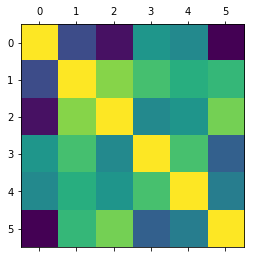

In [64]:
plt.matshow(basket_ball.corr())  # 색이 밝을 수록 더 관계가 깊다! (양의 상관관계)

Text(0, 0.5, '2P')

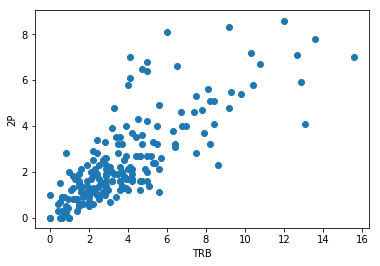

In [65]:
# 리바운드와 2점슛의 관계 살펴보기 ==> ***'양의 상관 관계'임을 알 수 있다!***
plt.scatter(basket_ball['TRB'],basket_ball['2P']) # 두 개의 변수만 놓고 산점도 보기
plt.xlabel('TRB') # 리바운드
plt.ylabel('2P') # 2점 슛
# 우상향 (양의 상관관계)

In [71]:
# 위의 scatter 그래프 : 아래의 상관관계 표에서 TRB와 2P만 뽑아서 x, y축으로 둔 것
basket_ball.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
4,LaMarcus Aldridge,C,0.1,8.3,9.2,2.4,0.5,1.3
5,Rawle Alkins,SG,0.3,1.0,2.6,1.3,0.1,0.0
6,Grayson Allen,SG,0.8,0.9,0.6,0.7,0.2,0.2
7,Jarrett Allen,C,0.1,4.1,8.4,1.4,0.5,1.5
8,Kadeem Allen,SG,0.9,2.5,2.7,4.0,0.8,0.2


### cf. 3점슛을 잘하는 선수가 2점슛도 잘 할까? (가설 세우기)
우측 상단에 데이터가 많으면 가설이 맞지만, 아니므로 옳지 않은 가설!

Text(0, 0.5, '2P')

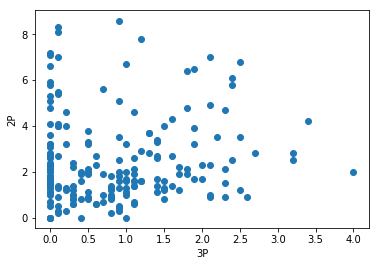

In [66]:
plt.scatter(basket_ball['3P'],basket_ball['2P']) # 두 변수(열)의 데이터만 뽑아서 비교
plt.xlabel('3P')
plt.ylabel('2P')